<a href="https://colab.research.google.com/github/PRihana/Machine-learning/blob/master/08_04_2020(ML)Gridsearch_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data = pd.read_csv("/content/bostonhousing.csv")

In [2]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [0]:
y = data['medv']
x = data.drop("medv",axis=1)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=23)

In [5]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21
301,0.03537,34.0,6.09,0,0.433,6.590,40.4,5.4917,7,329,16.1,395.75,9.50
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
177,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345,18.9,396.90,8.79


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=4,weights="distance")
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

43.11097182880768

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=4,weights="uniform")
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

44.80862204724409

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

45.59168503937007

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

49.162388451443576

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mean_squared_error(y_test,y_pred)

50.20116663988429

In [11]:
d ={}
d_train ={}
for i in range(4,12,2):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    y_tr = knr.predict(x_train)
    d_train[i] = mean_squared_error(y_train,y_tr)
    y_pred= knr.predict(x_test)
    d[i] = mean_squared_error(y_test,y_pred)
d

{4: 44.80862204724409,
 6: 48.25076771653545,
 8: 50.09510703740159,
 10: 46.7091661417323}

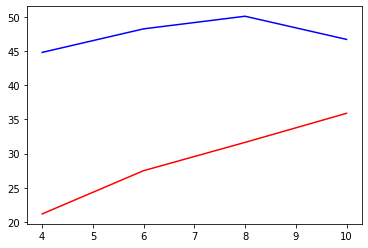

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(d.keys()),list(d.values()),'b')
plt.plot(list(d_train.keys()),list(d_train.values()),'r')

In [13]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid={"n_neighbors":range(2,10),"weights":['uniform','distance']},\
                    scoring=mse,cv=4)
grid.fit(x_train,y_train)

NameError: ignored

In [14]:
from sklearn.metrics import make_scorer
help(make_scorer)

Help on function make_scorer in module sklearn.metrics._scorer:

make_scorer(score_func, greater_is_better=True, needs_proba=False, needs_threshold=False, **kwargs)
    Make a scorer from a performance metric or loss function.
    
    This factory function wraps scoring functions for use in GridSearchCV
    and cross_val_score. It takes a score function, such as ``accuracy_score``,
    ``mean_squared_error``, ``adjusted_rand_index`` or ``average_precision``
    and returns a callable that scores an estimator's output.
    
    Read more in the :ref:`User Guide <scoring>`.
    
    Parameters
    ----------
    score_func : callable,
        Score function (or loss function) with signature
        ``score_func(y, y_pred, **kwargs)``.
    
    greater_is_better : boolean, default=True
        Whether score_func is a score function (default), meaning high is good,
        or a loss function, meaning low is good. In the latter case, the
        scorer object will sign-flip the outcome of 

In [0]:
mse =make_scorer(mean_squared_error,greater_is_better=False)

In [16]:
grid.best_estimator_

NameError: ignored

In [17]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [19]:
y_pred = grid.predict(x_test)

NameError: ignored

In [20]:
mean_squared_error(y_pred,y_test)

46.7091661417323

**Pipeline**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
estimators = [("scaler",MinMaxScaler()),("knn",KNeighborsRegressor())]
pipe = Pipeline(estimators)
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [0]:
y_pred = pipe.predict(x_test)

In [23]:
mean_squared_error(y_pred,y_test)

16.733691338582673